<a href="https://colab.research.google.com/github/searchforpassion/playing_with_pytorch/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing packages and preparing data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=2, n_clusters_per_class=1)

(100, 2) (100,)
[[-0.53217655  0.62924614]
 [ 0.91255258  1.83216496]
 [-1.01552104  1.32130405]
 [-1.72720358  2.01580762]
 [ 0.57936765 -0.17841637]] [0 1 0 0 1]


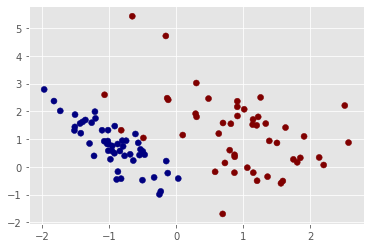

In [8]:
# checking data
print(X.shape,Y.shape)
print(X[:5], Y[:5])
plt.style.use('ggplot')
plt.scatter(X[:, 0], X[:, 1], c=Y,cmap='jet')

In [9]:
import torch
# defining pytorch logistic regression model using torch.nn 
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
    torch.nn.Sigmoid(),
)

In [10]:
# checking model and parameters
params = list(model.parameters())
print(model)
print(params)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)
[Parameter containing:
tensor([[-0.7026, -0.0223]], requires_grad=True), Parameter containing:
tensor([-0.6680], requires_grad=True)]


In [11]:
# converting numpy arrays to torch tensors
x = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(Y.astype(np.float32)).view(-1,1)
print(x.size(),y.size())

torch.Size([100, 2]) torch.Size([100, 1])


In [12]:
# binary cross entropy loss
loss_fn = torch.nn.BCELoss()
learning_rate = 1e-1
loss_list = []
# training
for t in range(1000):
    # forward propagation
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    loss_list.append(loss.item())
    if t % 100 == 99:
        print(t, loss.item())
    #backward propagation
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

99 0.21145986020565033
199 0.15295982360839844
299 0.1311390995979309
399 0.11932980269193649
499 0.11175642907619476
599 0.10639804601669312
699 0.1023564413189888
799 0.0991683304309845
899 0.09656896442174911
999 0.09439542889595032


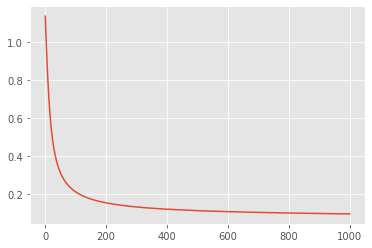

In [13]:
# visualizing loss minimizing through training steps
step = np.linspace(0,1000,1000)
plt.plot(step,np.array(loss_list))

In [14]:
# checking decision boundary
w = params[0].detach().numpy()[0]
b = params[1].detach().numpy()[0]
print(w,b)

[4.293963  1.7519943] -0.5116806


(-2.1952617801785026, 5.924981491502216)

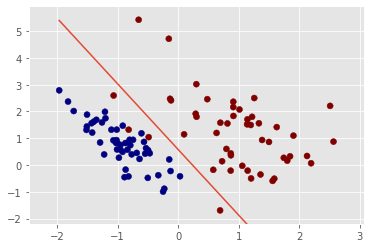

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y,cmap='jet')
u = np.linspace(X[:, 0].min(), X[:, 0].max(), 2)
plt.plot(u, (0.5-b-w[0]*u)/w[1]); # if w[1] not equals 0
plt.xlim(X[:, 0].min()-0.5, X[:, 0].max()+0.5)
plt.ylim(X[:, 1].min()-0.5, X[:, 1].max()+0.5)